# 서울의 기온이 가장 높았던 날의 날짜와 기온 구하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./Seoul_Temp/seoul.csv', encoding='cp949')

df.fillna(-100, inplace=True)

max_temp = -999
date = ''

for t in df.values:
    if t[-1] > max_temp:
        max_temp = t[-1]
        date = t[0]

print(f'서울의 기온이 가장 높았던 날의 날짜는 {date}이고 기온은 {max_temp}이다.')

서울의 기온이 가장 높았던 날의 날짜는 2018-08-01이고 기온은 39.6이다.


# 내 생일의 기온 변화를 그래프로 그리기

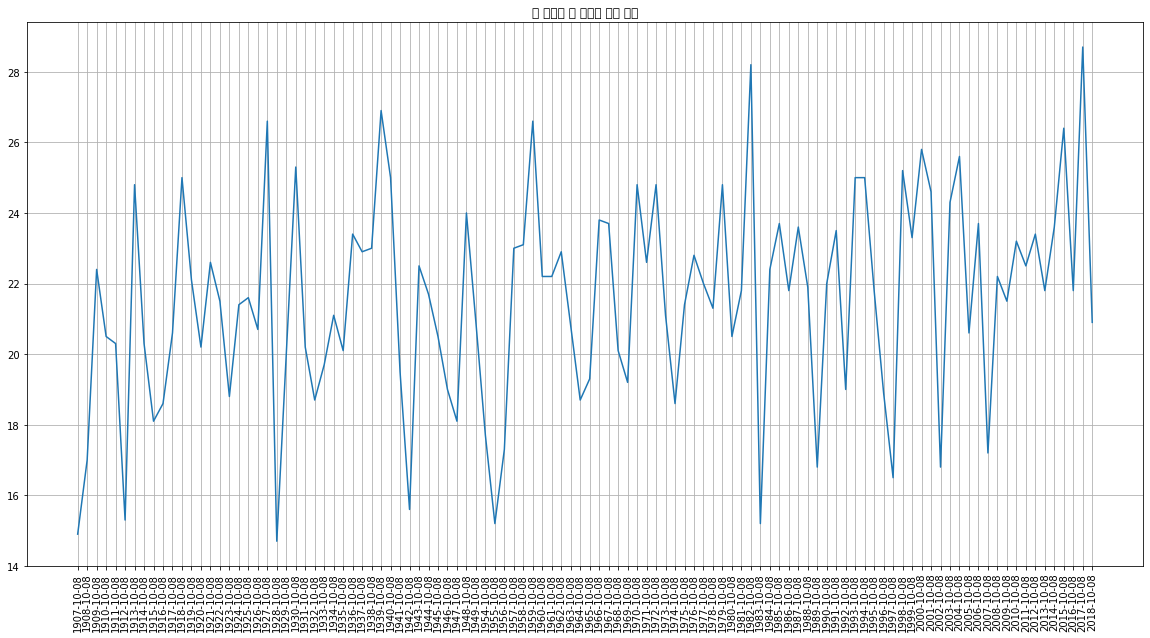

In [2]:
import csv 
import matplotlib.pyplot as plt
import numpy as np

f = open('./Seoul_Temp/seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)

date = []
result = []

for row in data:
    if row[4] != '':
        if row[0].split('-')[1] == '10' and row[0].split('-')[2] == '08':
            result.append(float(row[4]))
            date.append(row[0])

sort_result = sorted(result)

x = np.arange(len(date))
y = np.arange(len(result))

plt.figure(figsize=(20,10))
plt.plot(x, result)
plt.xticks(x, date, rotation=90)
plt.title('내 생일의 각 연도별 최고 온도')
plt.rc('font', family = 'NanumGothic')
plt.rc('font', size=10)
plt.grid(True)
plt.show()

# 서울의 최고 기온 데이터를 상자 그림으로 표현하기

min: -16.3
1/4: 0.9
1/2: 12.3
3/4: 30.3
max: 39.6


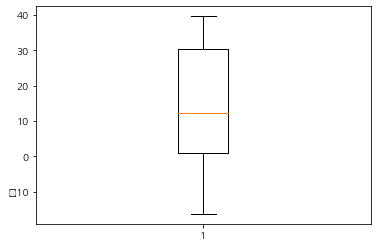

In [3]:
import csv 
import numpy as np
import matplotlib.pyplot as plt

f = open('./Seoul_Temp/seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data) 

result = []

for row in data:
    if row[4] != '':
        if row[0].split('-')[1] =='01' or row[0].split('-')[1] == '08':
            result.append(float(row[4]))

sort_result = sorted(result)

y_result = np.array(sort_result)

plt.boxplot(sort_result)

print(f'min: {np.percentile(y_result, 0)}')
print(f'1/4: {np.percentile(y_result, 25)}')
print(f'1/2: {np.percentile(y_result, 50)}')
print(f'3/4: {np.percentile(y_result, 75)}')
print(f'max: {np.percentile(y_result, 100)}')

# 제주도의 성별 인구 비율 표현하기

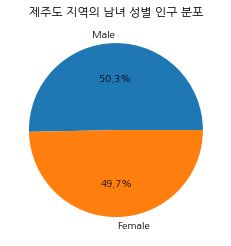

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Population_public_data/gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

name = input()

m = []

for row in data:
    if name in row[0]:
        m.append(row[1])
        m.append(row[104])

label = ['Male', 'Female']

plt.pie(m, labels=label, autopct='%.1f%%')
plt.title('제주도 지역의 남녀 성별 인구 분포')
plt.show()

# 꺾은선 그래프로 표현하기 

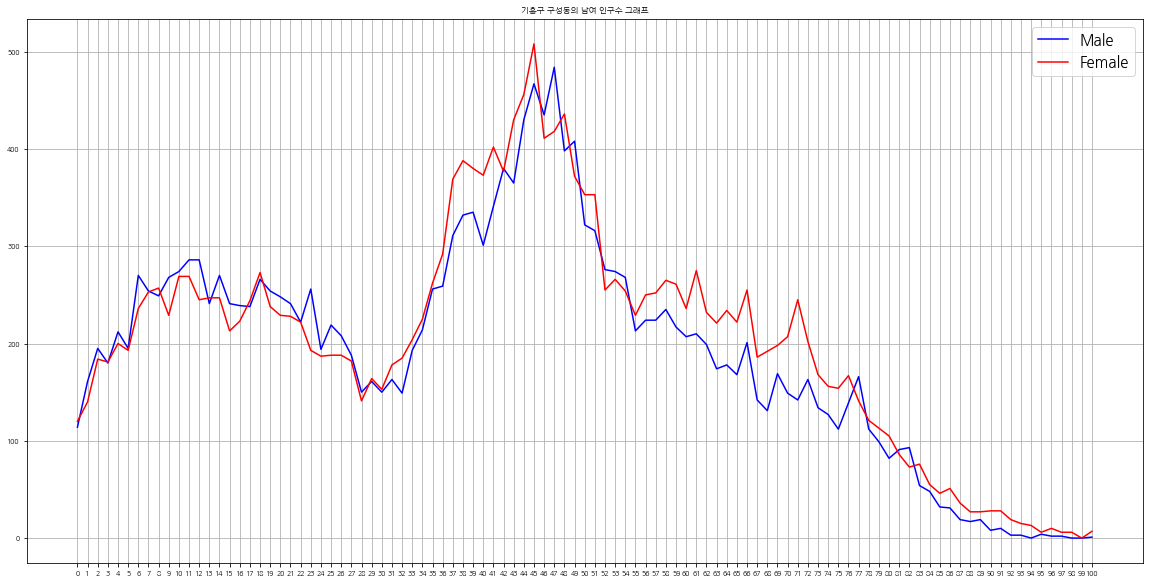

In [20]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Population_public_data/gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

m = []
f = []

name = input()

for row in data:
    row[3:] = map(int, row[3:])
    if name in row[0]:
        m.append(row[3:104])
        f.append(row[106:])

m_array = np.array(m).ravel().tolist()
f_array = np.array(f).ravel().tolist()

x = np.arange(len(m_array))

plt.figure(figsize=(20,10))
plt.plot(x, m_array, 'b', label='Male')
plt.plot(x, f_array, 'r', label='Female')
plt.xticks(x)
plt.title(f'{name}의 남여 인구수 그래프')
plt.rc('font', family='NanumGothic', size=8)
plt.legend(loc='upper right', fontsize=15)
plt.grid(True)
plt.show()

# 막대그래프로 표현하기

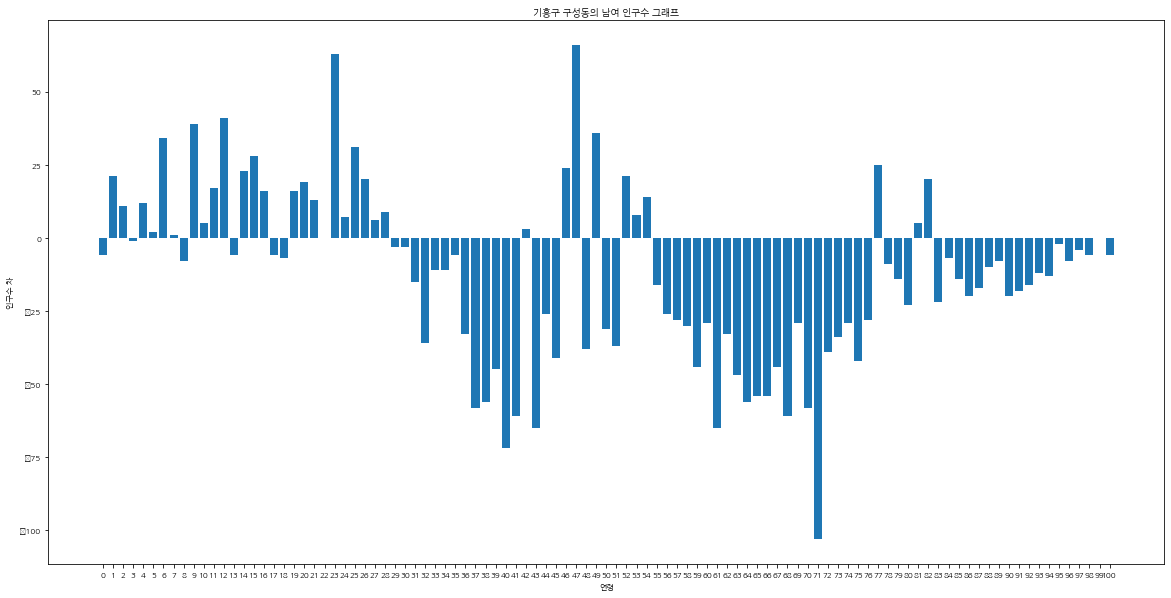

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Population_public_data/gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

m = []
f = []

name = input()

for row in data:
    row[3:] = map(int, row[3:])
    if name in row[0]:
        m = row[3:104]
        f = row[106:]

m_array = np.array(m)
f_array = np.array(f)

x = np.arange(0,101)

result = m_array - f_array

plt.figure(figsize=(20,10))
plt.bar(x, result)
plt.xticks(x)
plt.xlabel('연령')
plt.ylabel('인구수 차')
plt.title(f'{name}의 남여 인구수 그래프')
plt.rc('font', family='NanumGothic', size=8)
plt.show()

# 제주도의 연령대별 성별 비율을 산점도로 표현하기

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('./Population_public_data/gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)